# 반려동물 안구질환 판정 모델

##### 해당 모델은 AI hub의 제공 데이터셋을 활용했습니다.

### 데이터셋 입력

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import json
import os, glob
import shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow import keras

In [2]:
caltech_dir = '/Users/hk/Desktop/AI/Project/dataset/pet_eyedisease/train'
categories = ['Y', 'N']
nb_classes = len(categories)

In [3]:
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
Y = []

for idx, cat in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    
    image_dir = caltech_dir + '/' + cat
    files = glob.glob(image_dir+'/*.jpg')
    
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert('RGB')
        img = img.resize((64, 64))
        data = np.asarray(img)
        
        X.append(data)
        Y.append(label)

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
train_input, val_input, train_target, val_target = train_test_split(
    X, Y, test_size=0.2)

In [6]:
train_input.shape

(753, 64, 64, 3)

### 모델 생성

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(nb_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

### 훈련

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_input, train_target, epochs=20,
                   validation_data=(val_input, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
24/24 [==============================] - 2s 46ms/step - loss: 8.8936 - accuracy: 0.8367 - val_loss: 0.5042 - val_accuracy: 0.7884
Epoch 2/20
24/24 [==============================] - 1s 42ms/step - loss: 0.1888 - accuracy: 0.9469 - val_loss: 0.1891 - val_accuracy: 0.9471
Epoch 3/20
24/24 [==============================] - 1s 40ms/step - loss: 0.1309 - accuracy: 0.9562 - val_loss: 0.3262 - val_accuracy: 0.9206
Epoch 4/20
24/24 [==============================] - 1s 42ms/step - loss: 0.0843 - accuracy: 0.9734 - val_loss: 0.1670 - val_accuracy: 0.9471
Epoch 5/20
24/24 [==============================] - 1s 42ms/step - loss: 0.0597 - accuracy: 0.9814 - val_loss: 0.1635 - val_accuracy: 0.9471
Epoch 6/20
24/24 [==============================] - 1s 40ms/step - loss: 0.0382 - accuracy: 0.9854 - val_loss: 0.1793 - val_accuracy: 0.9418
Epoch 7/20
24/24 [==============================] - 1s 40ms/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.2064 - val_accuracy: 0.9365


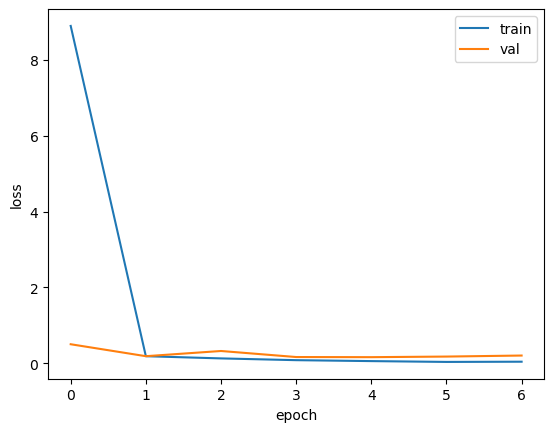

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 모델 평가

In [11]:
model.evaluate(val_input, val_target)

6/6 [==============================] - 0s 8ms/step - loss: 0.1635 - accuracy: 0.9471


[0.16347837448120117, 0.9470899701118469]

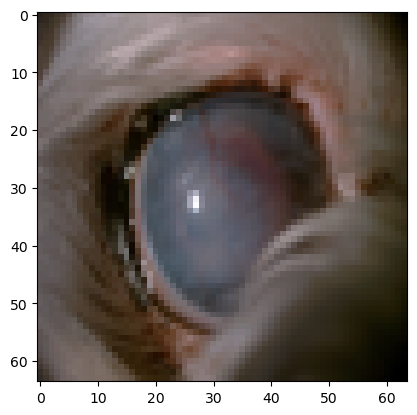

In [12]:
plt.imshow(val_input[111], cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_input[111:112])
print(preds)

1/1 [==============================] - 0s 45ms/step
[[0.98787224 0.01212772]]


In [14]:
classes = ['Y', 'N']

print(classes[np.argmax(preds)])

Y


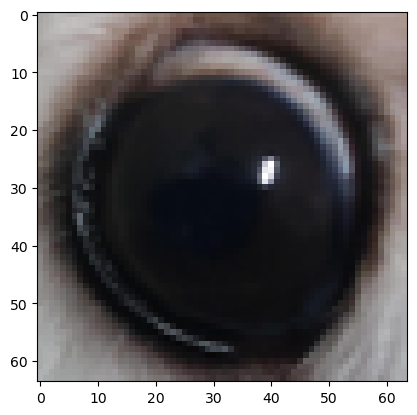

In [15]:
plt.imshow(val_input[188], cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_input[188:189])
print(preds)

1/1 [==============================] - 0s 11ms/step
[[4.8000497e-06 9.9999523e-01]]


In [17]:
print(classes[np.argmax(preds)])

N
